             municipio total 5 estrella 4 estrella 3 estrella 2 estrella  \
0              bolanos     3          0          0          0          0   
1          chimaltitan     1          0          0          0          0   
2             colotlan     2          0          1          0          0   
3             huejucar     4          0          0          0          0   
4  huejuquilla el alto     4          0          0          2          0   

  1 estrella sin catego   año region                        geometry  
0          1          2  2013  norte  POINT (612211.428 2395738.544)  
1          0          1  2013  norte  POINT (651852.104 2408890.109)  
2          1          0  2013  norte  POINT (692610.712 2439235.534)  
3          4          0  2013  norte  POINT (682714.170 2472578.468)  
4          0          2  2013  norte  POINT (614467.136 2484608.942)  


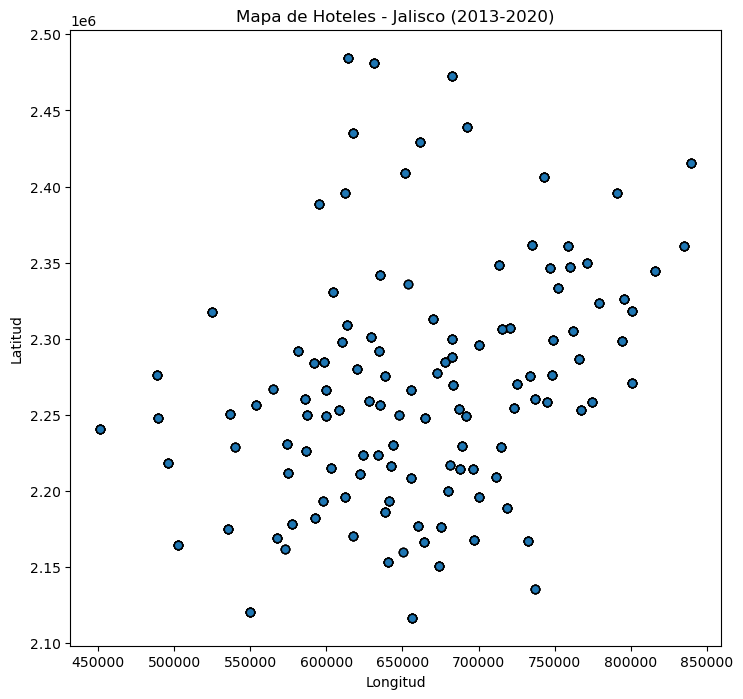

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Carga del shapefile (asegúrate que todos los archivos están en el mismo directorio)
gdf = gpd.read_file("df_hoteles.shp")

# Mostrar las primeras filas
print(gdf.head())

# Visualizar el mapa
gdf.plot(figsize=(10, 8), edgecolor='black')
plt.title("Mapa de Hoteles - Jalisco (2013-2020)")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.show()


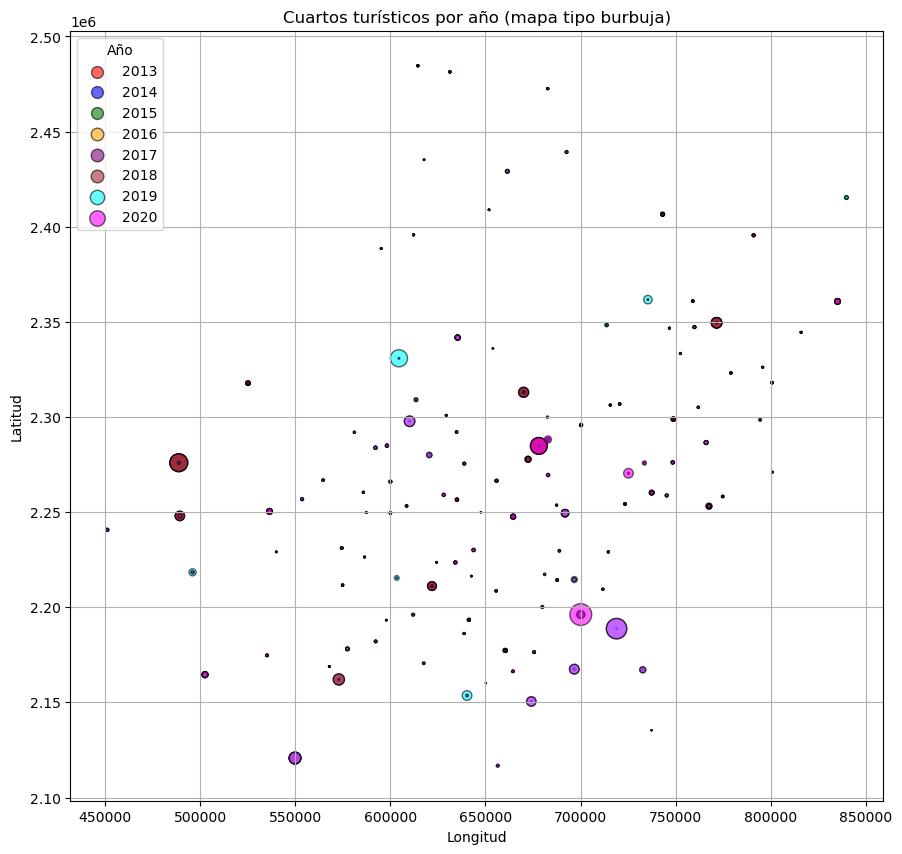

In [4]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Cargar shapefile
gdf = gpd.read_file("df_hoteles.shp")

# Convertir columna 'total' a tipo numérico
gdf['total'] = pd.to_numeric(gdf['total'], errors='coerce')

# Crear figura
fig, ax = plt.subplots(figsize=(12, 10))

# Crear lista de colores (puedes ampliar si tienes más años)
colores = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'cyan', 'magenta']

# Agrupar por año y graficar
for i, (año, grupo) in enumerate(gdf.groupby('año')):
    grupo.plot(
        ax=ax,
        markersize=grupo['total'] * 0.5,
        color=colores[i % len(colores)],
        alpha=0.6,
        label=str(año),
        edgecolor='black'
    )

plt.title("Cuartos turísticos por año (mapa tipo burbuja)")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.legend(title="Año")
plt.grid(True)
plt.show()


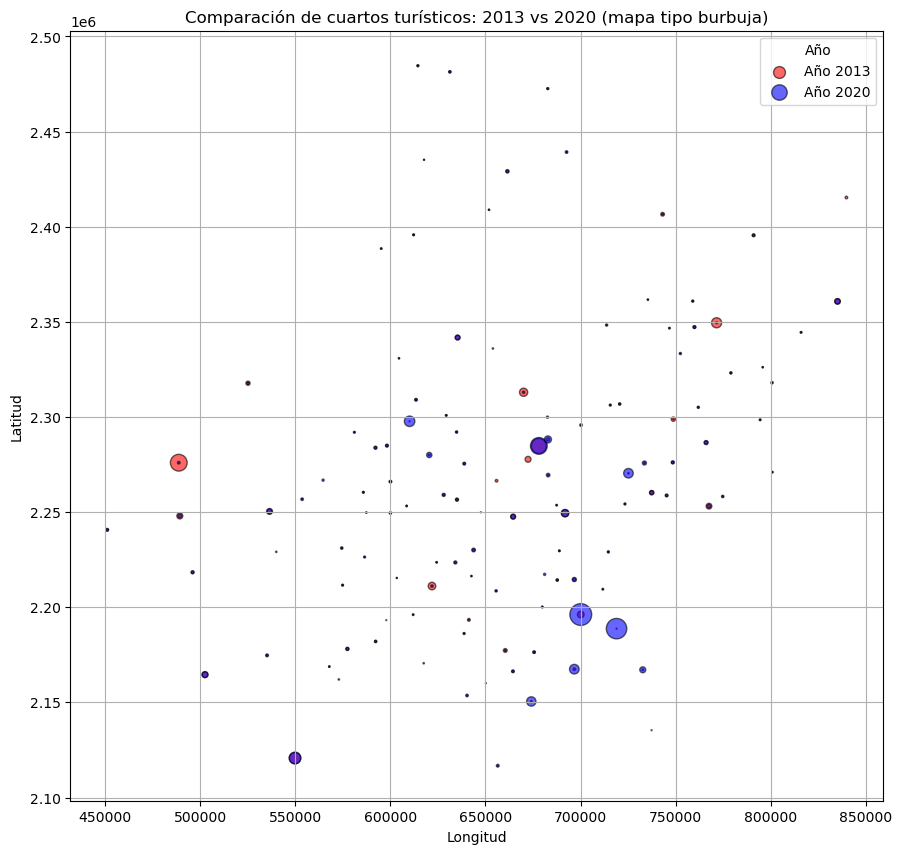

In [5]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Cargar shapefile
gdf = gpd.read_file("df_hoteles.shp")

# Convertir columna 'total' a tipo numérico
gdf['total'] = pd.to_numeric(gdf['total'], errors='coerce')

# Filtrar solo los años 2013 y 2020
gdf = gdf[gdf['año'].isin([2013, 2020])]

# Crear figura
fig, ax = plt.subplots(figsize=(12, 10))

# Colores para 2013 y 2020
colores = ['red', 'blue']

# Agrupar por año y graficar
for i, (año, grupo) in enumerate(gdf.groupby('año')):
    grupo.plot(
        ax=ax,
        markersize=grupo['total'] * 0.5,
        color=colores[i],
        alpha=0.6,
        label=f"Año {año}",
        edgecolor='black'
    )

plt.title("Comparación de cuartos turísticos: 2013 vs 2020 (mapa tipo burbuja)")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.legend(title="Año")
plt.grid(True)
plt.show()


In [6]:
jalisco_df = gpd.read_file('LimiteMunicipal_MGJ2012_modificadoDecreto26837.shp')

C:\Users\oweno\AppData\Local\Temp\ipykernel_7636\1581222946.py:39: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Año")
C:\Users\oweno\AppData\Local\Temp\ipykernel_7636\1581222946.py:39: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Año")
C:\Users\oweno\AppData\Local\Temp\ipykernel_7636\1581222946.py:39: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Año")


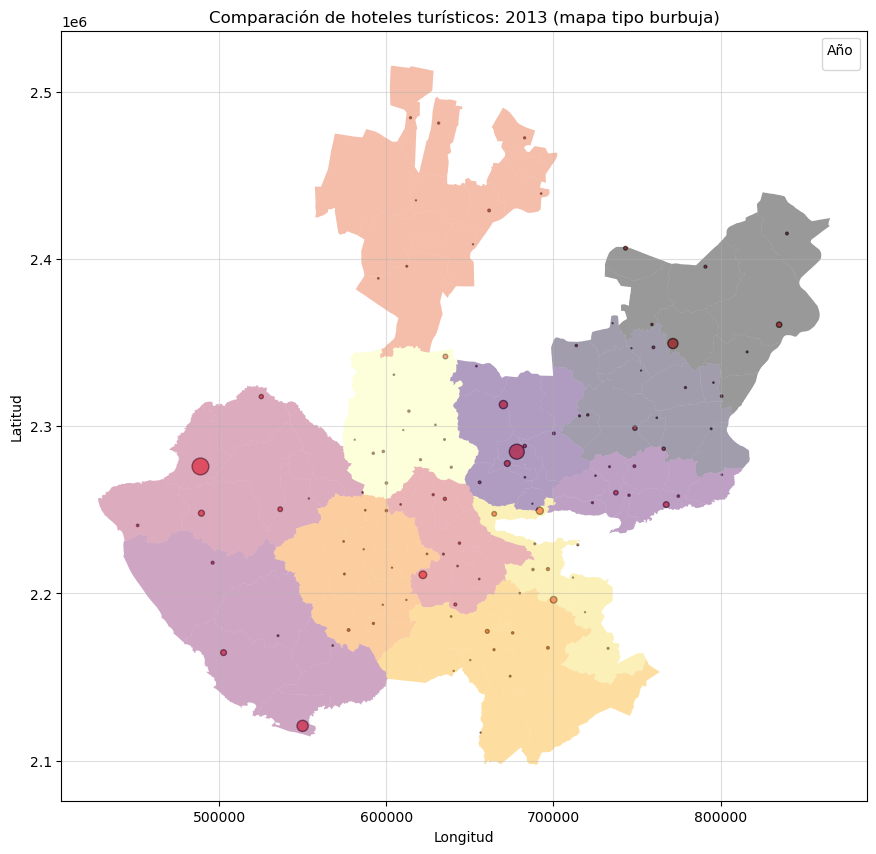

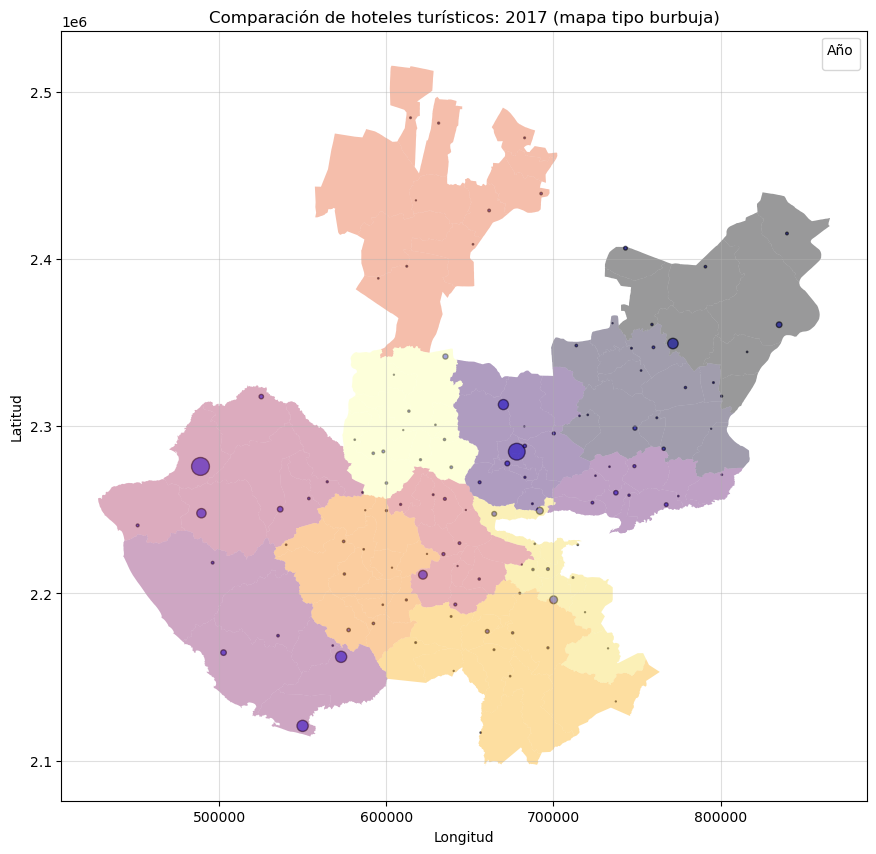

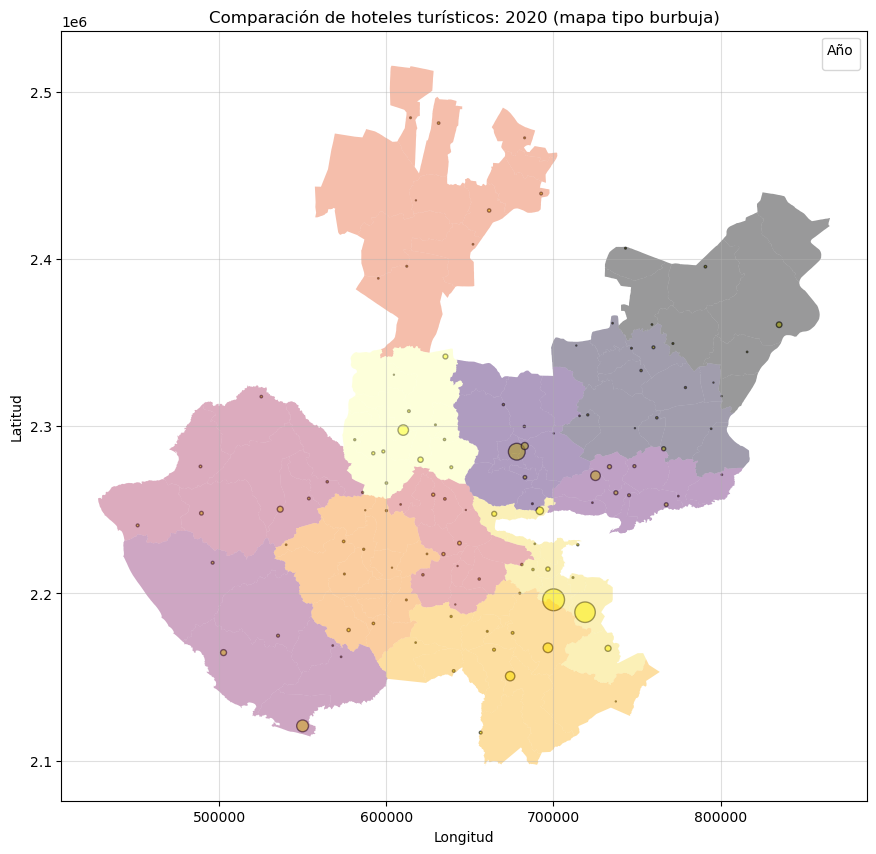

In [8]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar shapefile
gdf = gpd.read_file("df_hoteles.shp")

# Convertir columna 'total' a tipo numérico
gdf['total'] = pd.to_numeric(gdf['total'], errors='coerce')

# Filtrar solo los años 2013 y 2020
gdf = gdf[gdf['año'].isin([2013,2017,2020])]

# Crear figura

# Colores para 2013 y 2020
colores = ['red', 'blue','yellow']
colors = sns.color_palette('inferno',jalisco_df['REGIÓN'].nunique(),as_cmap=True)


# Agrupar por año y graficar
for i, (año, grupo) in enumerate(gdf.groupby('año')):
    fig, ax = plt.subplots(figsize=(12, 10))
    grupo.plot(
        ax=ax,
        markersize=grupo['total'] * 0.5,
        color=colores[i],
        alpha=0.6,
        edgecolor='black'
    )

    jalisco_df.plot(column='REGIÓN', alpha=.4, ax=ax, legend=True, cmap=colors)

    plt.grid(alpha=.4)
    plt.title(f"Comparación de hoteles turísticos: {año} (mapa tipo burbuja)")
    plt.xlabel("Longitud")
    plt.ylabel("Latitud")
    plt.legend(title="Año")
